In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from deepjets import learning, models, preprocessing, utils

//anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Using Theano backend.
//anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [9]:
model = models.get_maxout(25**2)
learning.train_model(model, 'datasets/w_ns_mslice_mini_train.h5', 'models/w_ns_mslice_mini',
                     epochs=50, patience=10)

Training on 16000 samples, validating on 4000 samples.
Datasets from datasets/w_ns_mslice_mini_train.h5.
Epoch 28/50: epochs w/o improvement = 10, score = 0.461739913374                    
Patience tolerance reached.
Training complete. Best validation score = 0.459414068609


Testing on 20000 samples.
Dataset from datasets/w_ns_mslice_mini_test.h5.
Score    = 0.442181452811
ROC AUC  = 0.940453811223
Accuracy = 16044/20000 = 0.8022



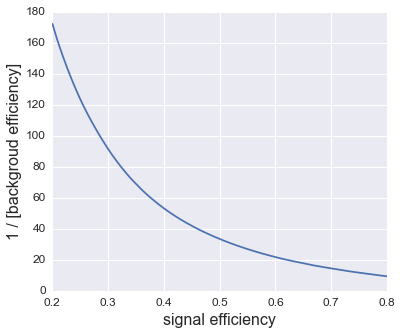

In [13]:
roc = learning.test_model(models.load_model('models/w_ns_mslice_mini'),
                          'datasets/w_ns_mslice_mini_test.h5', show_roc_curve=True)
# Cross-validation early stopping

In [11]:
model = models.get_maxout(25**2)
learning.train_model(model, 'datasets/w_ns_mslice_mini_train.h5',
                     'models/w_ns_mslice_mini_roc', use_auc_score=True, epochs=50, patience=10)

Training on 16000 samples, validating on 4000 samples.
Datasets from datasets/w_ns_mslice_mini_train.h5.
Epoch 48/50: epochs w/o improvement = 10, score = 0.937812993791                    
Patience tolerance reached.
Training complete. Best validation score = 0.939083474776


Testing on 20000 samples.
Dataset from datasets/w_ns_mslice_mini_test.h5.
Score    = 0.443690628558
ROC AUC  = 0.940180461999
Accuracy = 16089/20000 = 0.80445



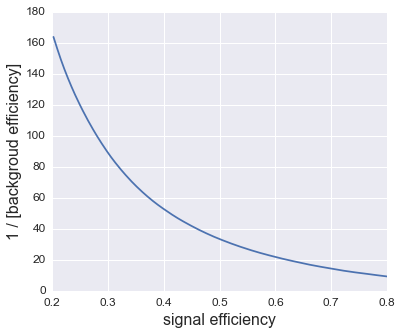

In [12]:
roc = learning.test_model(models.load_model('models/w_ns_mslice_mini_roc'),
                          'datasets/w_ns_mslice_mini_test.h5', show_roc_curve=True)
# AUC early stopping